In [1]:
import json
import os
from train import Trainer
import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')

import torch
torch.cuda.is_available()

['/home/zuzanna/miniconda3/lib/python312.zip', '/home/zuzanna/miniconda3/lib/python3.12', '/home/zuzanna/miniconda3/lib/python3.12/lib-dynload', '', '/home/zuzanna/miniconda3/lib/python3.12/site-packages', '/home']


/home/zuzanna/miniconda3/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/zuzanna/miniconda3/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/zuzanna/miniconda3/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/home/zuzanna/miniconda3/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing CSCDataset from `anndata.experimental` is deprecated. Import anndata.abc.CSCDataset instead.
  warnings.warn(msg, FutureWarning)
/home/zuzanna/miniconda3/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing CSRDataset from `anndata.expe

True

In [2]:
# Initialize the Trainer
my_trainer = Trainer(config_path="./config_multivi.json")

# Load all datasets
datasets = my_trainer.load_datasets()



Loaded configuration successfully.
Datasets Detected: ['dataset_Pbmc10k', 'dataset_TEA']
Loaded configuration successfully.
Loaded configuration successfully.
Added `interval` annotation for features from /home/zuzanna/data/GSM4949911_X061-AP0C1W1_leukopak_perm-cells_tea_fulldepth_cellrangerarc_filtered_feature_bc_matrix.h5
Loaded configuration successfully.
Added `interval` annotation for features from /home/zuzanna/data/GSM4949911_X061-AP0C1W1_leukopak_perm-cells_tea_fulldepth_cellrangerarc_filtered_feature_bc_matrix.h5
Loaded configuration successfully.
Loaded configuration successfully.


In [3]:
datasets

{'dataset_Pbmc10k': {'modalities': ['rna', 'atac'],
  'data': [AnnData object with n_obs × n_vars = 9578 × 2000
       obs: 'domain', 'cell_type', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
       var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
       uns: 'log1p', 'hvg'
       layers: 'counts',
   AnnData object with n_obs × n_vars = 9538 × 15000
       obs: 'domain', 'cell_type', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts'
       var: 'feature_types', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'lo


=== Processing dataset: dataset_Pbmc10k ===
Initializing MultiVI Model
Loaded configuration successfully.
Data columns before training Index(['feature_types', 'n_cells_by_counts', 'mean_counts',
       'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts',
       'log1p_total_counts', 'highly_variable', 'means', 'dispersions',
       'dispersions_norm'],
      dtype='object')
AnnData object with n_obs × n_vars = 9505 × 17000
    obs: 'cell_type', 'modality'
    var: 'feature_types', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    layers: 'counts'
                    cell_type  modality
cells                                  
AAACAGCCAATCCCTT-1    CD4 TCM         0
AAACAGCCAATGCGCT-1  CD4 Naive         0
AAACAGCCACCAACCG-1  CD8 Naive         0
AAACAGCCAGGATAAC-1  CD4 Naive         0
AAACAGCCAGTTTACG-1    CD4 TCM         0
...                  

Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4080') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Loaded models for dataset_Pbmc10k: dict_keys(['multivi'])

Training model: multivi for dataset: dataset_Pbmc10k
Training MultiVI Model
Data columns before training Index(['feature_types', 'n_cells_by_counts', 'mean_counts',
       'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts',
       'log1p_total_counts', 'highly_variable', 'means', 'dispersions',
       'dispersions_norm'],
      dtype='object')
Moving MultiVI model to gpu
Invalid device 'gpu' specified. Use 'cpu' or 'gpu'.
Epoch 385/500:  77%|███████▋  | 385/500 [10:45<03:12,  1.68s/it, v_num=1, train_loss_step=2.36e+3, train_loss_epoch=2.42e+3]
Monitored metric reconstruction_loss_validation did not improve in the last 50 records. Best score: 2526.811. Signaling Trainer to stop.
Training completed.
Data columns after training Index(['feature_types', 'n_cells_by_counts', 'mean_counts',
       'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts',
       'log1p_total_counts', 'highly_variable', 'means', 'dispersi

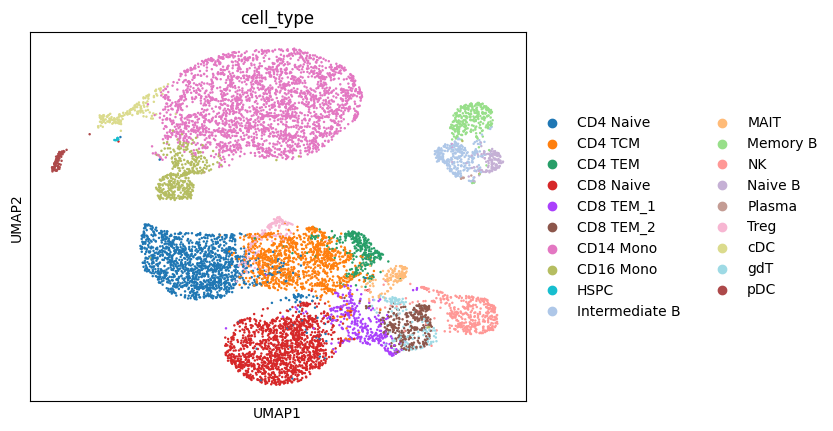

A UMAP plot for MultiVI model with dataset dataset_Pbmc10k was succesfully generated and saved as multivi_dataset_Pbmc10k_umap_plot.png

=== Processing dataset: dataset_TEA ===
Initializing MultiVI Model
Loaded configuration successfully.
Data columns before training Index(['highly_variable'], dtype='object')
AnnData object with n_obs × n_vars = 7084 × 17046
    obs: 'modality'
    var: 'highly_variable'
    layers: 'counts'
                    modality
AAACAGCCAATTAGGA-1         0
AAACAGCCACGTAAGG-1         0
AAACAGCCACTAAGAA-1         0
AAACATGCAAAGGCCA-1         0
AAACATGCAACTAACT-1         0
...                      ...
TTTGTTGGTCATAACG-1         0
TTTGTTGGTGATTACG-1         0
TTTGTTGGTTAGAGGG-1         0
TTTGTTGGTTATAGCG-1         0
TTTGTTGGTTTAAAGC-1         0

[7084 rows x 1 columns]


KeyError: 'feature_types'

In [4]:
# Iterate over datasets
for dataset_name, dataset_data in datasets.items():
    print(f"\n=== Processing dataset: {dataset_name} ===")
    
    # Select models for this dataset
    models = my_trainer.model_select(dataset_name, dataset_data)
    print(f"Loaded models for {dataset_name}: {models.keys()}")
    
    # Train each model
    for model_name, model in models.items():
        print(f"\nTraining model: {model_name} for dataset: {dataset_name}")
        model.train()
        model.umap()  # Perform UMAP visualization if needed
